In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.feature_selection import SelectKBest, chi2
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error

In [2]:
housing = pd.read_csv("housing.csv")
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [3]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
housing.median_house_value.tail()

20635    78100.0
20636    77100.0
20637    92300.0
20638    84700.0
20639    89400.0
Name: median_house_value, dtype: float64

<Axes: xlabel='median_house_value', ylabel='Count'>

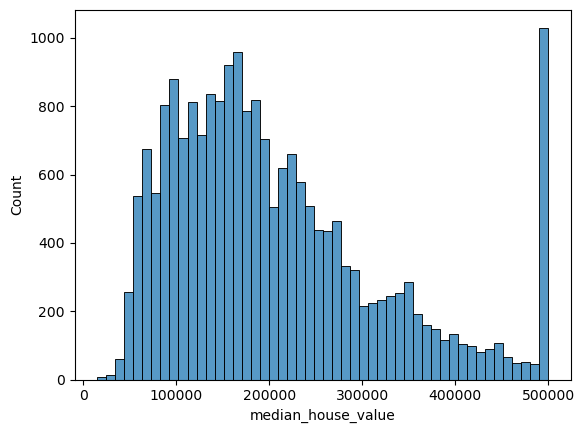

In [5]:
sns.histplot(housing.median_house_value, bins=50)

In [6]:
df = housing[(housing['ocean_proximity'] == '<1H OCEAN') | (housing['ocean_proximity'] == 'INLAND')]
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
701,-121.97,37.64,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0,<1H OCEAN
830,-121.99,37.61,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0,<1H OCEAN
859,-121.97,37.57,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0,<1H OCEAN
860,-121.96,37.58,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0,<1H OCEAN
861,-121.98,37.58,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0,<1H OCEAN


In [8]:
df = df[['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income','median_house_value']]

df.head()

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
701,37.64,-121.97,32.0,1283.0,194.0,485.0,171.0,6.0574,431000.0
830,37.61,-121.99,9.0,3666.0,711.0,2341.0,703.0,4.6458,217000.0
859,37.57,-121.97,21.0,4342.0,783.0,2172.0,789.0,4.6146,247600.0
860,37.58,-121.96,15.0,3575.0,597.0,1777.0,559.0,5.7192,283500.0
861,37.58,-121.98,20.0,4126.0,1031.0,2079.0,975.0,3.6832,216900.0


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15687 entries, 701 to 20639
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   latitude            15687 non-null  float64
 1   longitude           15687 non-null  float64
 2   housing_median_age  15687 non-null  float64
 3   total_rooms         15687 non-null  float64
 4   total_bedrooms      15530 non-null  float64
 5   population          15687 non-null  float64
 6   households          15687 non-null  float64
 7   median_income       15687 non-null  float64
 8   median_house_value  15687 non-null  float64
dtypes: float64(9)
memory usage: 1.2 MB


In [10]:
df.population.median()

1195.0

In [11]:
df.shape

(15687, 9)

In [12]:
df1 = df.copy()

In [14]:
n = len(df)
n

15687

In [16]:
n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_test - n_val
n , n_val, n_test, n_train, (n_val+n_test+n_train)

(15687, 3137, 3137, 9413, 15687)

In [17]:
df_val = df.iloc[:n_val]
df_test = df.iloc[n_val:n_val+n_test]
df_train = df.iloc[n_val+n_test:]

In [18]:
idx = np.arange(n)

In [19]:
np.random.seed(42)
np.random.shuffle(idx)

In [20]:
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]

df_train

,latitude,longitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
19963,36.23,-119.14,22.0,2935.0,523.0,1927.0,530.0,2.5875,70400.0
5929,34.12,-117.79,16.0,2426.0,426.0,1319.0,446.0,4.8125,224500.0
11377,33.68,-117.97,26.0,3653.0,568.0,1930.0,585.0,5.7301,260900.0
6443,34.10,-118.03,32.0,2668.0,609.0,1512.0,541.0,2.9422,233100.0
17546,37.34,-121.87,39.0,2479.0,541.0,1990.0,506.0,2.4306,289100.0
...,...,...,...,...,...,...,...,...,...
20157,34.44,-119.15,33.0,2005.0,392.0,1043.0,351.0,5.3080,297900.0
20005,36.13,-119.13,28.0,1673.0,385.0,1434.0,371.0,2.0586,40900.0
6691,34.13,-118.08,46.0,1238.0,147.0,377.0,145.0,8.4546,500001.0
3470,34.29,-118.46,24.0,3668.0,890.0,3151.0,810.0,3.0526,183300.0


In [21]:
len(df_train),len(df_val),len(df_test)

(9413, 3137, 3137)

In [22]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [23]:
y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [24]:
len(y_train),len(y_val),len(y_test)

(9413, 3137, 3137)

In [25]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [26]:
df_train1 = df_train.copy()
df_train2 = df_train.copy()
df_train3 = df_train.copy()

In [27]:
# Functions 

def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)


base = ['latitude','longitude','housing_median_age','total_rooms','total_bedrooms','population','households','median_income']

def prepare_X(df):
    df_num = df[base]
    df_num = df_num.fillna(0)
    X = df_num.values
    return X

### First Model with fill 0

In [29]:
print("sum before = ",df_train1.total_bedrooms.isna().sum())
df_train1.total_bedrooms = df_train1.total_bedrooms.fillna(0)
print("sum after = ",df_train1.total_bedrooms.isna().sum())

sum before =  94
sum after =  0


In [30]:
X_train1 = df_train1.fillna(0).values

w0_1, w_1 = train_linear_regression(X_train1, y_train)

y_pred_1 = w0_1 + X_train1.dot(w_1)

In [31]:
w0_1, y_pred_1

(-9.763249480961484,
 array([11.48901968, 12.14856943, 12.45852739, ..., 12.91332356,
        11.93076692, 12.11614341]))

<Axes: ylabel='Count'>

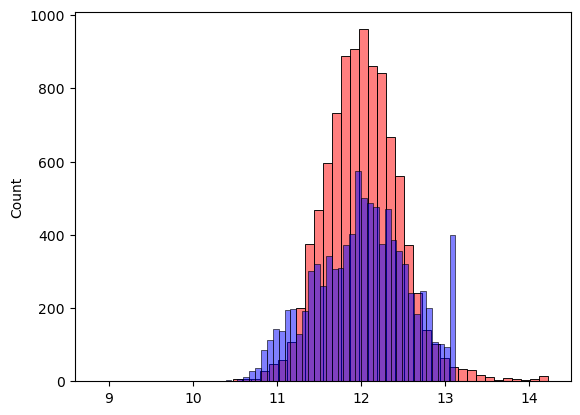

In [32]:
sns.histplot(y_pred_1, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [33]:
round(rmse(y_train, y_pred_1),2)

0.34

In [34]:
X_val = prepare_X(df_val)
y_pred_11 = w0_1 + X_val.dot(w_1)
round(rmse(y_val, y_pred_11),2)

0.34

### Second Model with Mean as replacement 

In [35]:
print("2nd Method sum before = ",df_train2.total_bedrooms.isna().sum())
df_train2.total_bedrooms = df_train2.total_bedrooms.fillna(df_train2.total_bedrooms.mean())
print("2nd Method sum after = ",df_train2.total_bedrooms.isna().sum())

2nd Method sum before =  94
2nd Method sum after =  0


In [36]:
X_train2 = df_train2.fillna(df_train2.total_bedrooms.mean()).values

w0_2, w_2 = train_linear_regression(X_train2, y_train)

y_pred_2 = w0_2 + X_train2.dot(w_2)

In [37]:
w0_2, y_pred_2

(-9.886133219255193,
 array([11.48148474, 12.14204505, 12.45148382, ..., 12.9139426 ,
        11.93466055, 12.11281089]))

<Axes: ylabel='Count'>

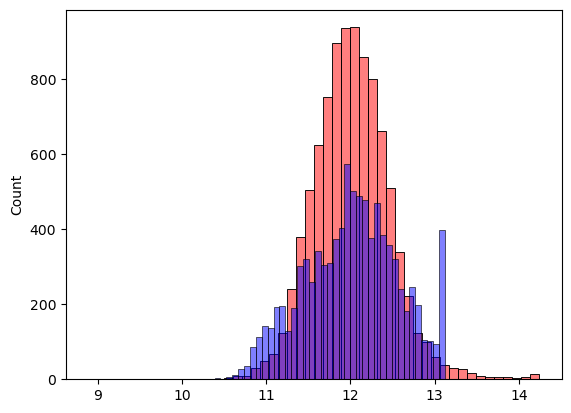

In [38]:
sns.histplot(y_pred_2, color='red', alpha=0.5, bins=50)
sns.histplot(y_train, color='blue', alpha=0.5, bins=50)

In [39]:
round(rmse(y_train, y_pred_2),2)

0.34

In [40]:
X_val = prepare_X(df_val)
y_pred_22 = w0_2 + X_val.dot(w_2)
round(rmse(y_val, y_pred_22),2)

0.34

###### The RMSE for both methods are thesame - 0.34

### Regularization 

In [42]:
df_train3.total_bedrooms = df_train3.total_bedrooms.fillna(0)
df_train3.isna().sum()

latitude              0
longitude             0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [43]:
def train_linear_regression_reg(X, y, r=0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])

    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [45]:
# for r=0

X_train3 = prepare_X(df_train3)

w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=0)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.34

In [46]:
# for r=0.000001

X_train3 = prepare_X(df_train3)

w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=0.000001)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.34

In [47]:
# for r=0.0001

X_train3 = prepare_X(df_train3)

w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=0.0001)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.34

In [48]:
# for r=0.001

X_train3 = prepare_X(df_train3)

w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=0.001)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.34

In [49]:
# for r=0.01

X_train3 = prepare_X(df_train3)

w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=0.01)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.34

In [50]:
# for r=0.1

X_train3 = prepare_X(df_train3)

w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=0.1)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.34

In [51]:
# for r=1

X_train3 = prepare_X(df_train3)

w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=1)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.34

In [52]:
# for r=5

X_train3 = prepare_X(df_train3)

w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=5)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.35

In [53]:
# for r=10

X_train3 = prepare_X(df_train3)

w0_3, w_3 = train_linear_regression_reg(X_train3, y_train, r=10)

X_val_3 = prepare_X(df_val)
y_pred_3 = w0_3 + X_val_3.dot(w_3)
round(rmse(y_val, y_pred_3),2)

0.35

In [54]:
rmse_scores =[]

In [60]:
for s in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    
    np.random.seed(s)
    np.random.shuffle(idx)
    df_train = df.iloc[idx[:n_train]]
    df_val = df.iloc[idx[n_train:n_train+n_val]]
    df_test = df.iloc[idx[n_train+n_val:]]
    
    df_train = df_train.reset_index(drop=True)
    df_val = df_val.reset_index(drop=True)
    df_test = df_test.reset_index(drop=True)

    y_train = np.log1p(df_train.median_house_value.values)
    y_val = np.log1p(df_val.median_house_value.values)
    y_test = np.log1p(df_test.median_house_value.values)
    
    # fillna with 0
    #df_train = df_train.fillna(0).values
    
    # train 
    X_train = prepare_X(df_train)
    w0, w = train_linear_regression(X_train, y_train)
    
    # validate
    X_val = prepare_X(df_val)
    y_pred = w0 + X_val.dot(w)
    
    
    # rmse
    score = round(np.sqrt(mean_squared_error(y_val, y_pred)),2)
    rmse_scores.append(score)
    
    print('Seed=  {} , Rmse score = {}'.format(s,score))


Seed=  0 , Rmse score = 0.34
Seed=  1 , Rmse score = 0.35
Seed=  2 , Rmse score = 0.33
Seed=  3 , Rmse score = 0.33
Seed=  4 , Rmse score = 0.34
Seed=  5 , Rmse score = 0.34
Seed=  6 , Rmse score = 0.34
Seed=  7 , Rmse score = 0.35
Seed=  8 , Rmse score = 0.34
Seed=  9 , Rmse score = 0.33


In [57]:
rmse_scores

[0.34, 0.34, 0.35, 0.35, 0.33, 0.35, 0.35, 0.33, 0.34, 0.34]

In [58]:
std = np.std(rmse_scores)
print(' STD of RMSE Scores = {}'.format(round(std,3)))

 STD of RMSE Scores = 0.007


In [61]:
np.random.seed(9)
np.random.shuffle(idx)
df_train = df.iloc[idx[:n_train]]
df_val = df.iloc[idx[n_train:n_train+n_val]]
df_test = df.iloc[idx[n_train+n_val:]]
    
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = np.log1p(df_train.median_house_value.values)
y_val = np.log1p(df_val.median_house_value.values)
y_test = np.log1p(df_test.median_house_value.values)

In [62]:
df_full_train = pd.concat([df_train, df_val])
df_full_train = df_full_train.reset_index(drop=True)
X_full_train = prepare_X(df_full_train)

y_full_train = np.concatenate([y_train, y_val])

In [63]:
w0, w = train_linear_regression_reg(X_full_train, y_full_train, r=0.001)

In [68]:
X_test = prepare_X(df_test)
y_pred = w0 + X_test.dot(w)
score = rmse(y_test, y_pred)
score

0.3369393984154841